# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [104]:
!pip install palmerpenguins

In [105]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [106]:
penguins = load_penguins()
penguins = penguins.dropna()

In [107]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Model 1

In [122]:
X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LinearRegression()
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline1 = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

my_model_1 = Pipeline1.fit(X_train, y_train)
y_test_preds1 = my_model_1.predict(X_test)
y_train_preds1 = my_model_1.predict(X_train)

model1_test_MSE = mean_squared_error(y_test, y_test_preds1)
model1_train_MSE = mean_squared_error(y_train, y_train_preds1)
model1_test_R2 = r2_score(y_test, y_test_preds1)
model1_train_R2 = r2_score(y_train, y_train_preds1)
model1_flexibility = len(my_model_1.named_steps['Linear Regression'].coef_)

### Model 2

In [123]:
X = penguins.drop(["bill_depth_mm", "flipper_length_mm"], axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LinearRegression()
enc = OneHotEncoder()
cols_to_encode = ["species", "island", "sex"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline1 = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

my_model_2 = Pipeline1.fit(X_train, y_train)
y_test_preds2 = my_model_2.predict(X_test)
y_train_preds2 = my_model_2.predict(X_train)

model2_test_MSE = mean_squared_error(y_test, y_test_preds2)
model2_train_MSE = mean_squared_error(y_train, y_train_preds2)
model2_test_R2 = r2_score(y_test, y_test_preds2)
model2_train_R2 = r2_score(y_train, y_train_preds2)
model2_flexibility = len(my_model_2.named_steps['Linear Regression'].coef_)

### Model 3

In [124]:
X = penguins.drop(["bill_depth_mm", "flipper_length_mm", "sex"], axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LinearRegression()
enc = OneHotEncoder()
cols_to_encode = ["species", "island"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline3 = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

my_model_3 = Pipeline3.fit(X_train, y_train)
y_test_preds3 = my_model_3.predict(X_test)
y_train_preds3 = my_model_3.predict(X_train)

model3_test_MSE = mean_squared_error(y_test, y_test_preds3)
model3_train_MSE = mean_squared_error(y_train, y_train_preds3)
model3_test_R2 = r2_score(y_test, y_test_preds3)
model3_train_R2 = r2_score(y_train, y_train_preds3)
model3_flexibility = len(my_model_3.named_steps['Linear Regression'].coef_)

### Model 4

In [125]:
X = penguins.drop(["bill_depth_mm", "flipper_length_mm", "sex", "body_mass_g"], axis=1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lr = LinearRegression()
enc = OneHotEncoder()
cols_to_encode = ["species", "island"]

ct = ColumnTransformer([
    ("One Hot Encoding", enc, cols_to_encode)
], remainder = "passthrough")

Pipeline4 = Pipeline([
    ("Column Transform", ct),
    ("Linear Regression", lr)
])

my_model_4 = Pipeline4.fit(X_train, y_train)
y_test_preds4 = my_model_4.predict(X_test)
y_train_preds4 = my_model_4.predict(X_train)

model4_test_MSE = mean_squared_error(y_test, y_test_preds4)
model4_train_MSE = mean_squared_error(y_train, y_train_preds4)
model4_test_R2 = r2_score(y_test, y_test_preds4)
model4_train_R2 = r2_score(y_train, y_train_preds4)
model4_flexibility = len(my_model_4.named_steps['Linear Regression'].coef_)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [126]:
df = pd.DataFrame({"Flexibility" : [model1_flexibility, model2_flexibility, model3_flexibility, model4_flexibility, model1_flexibility, model2_flexibility, model3_flexibility, model4_flexibility],
                   "MSE" :  [model1_test_MSE, model2_test_MSE, model3_test_MSE, model4_test_MSE, model1_train_MSE, model2_train_MSE, model3_train_MSE, model4_train_MSE],
                   "Rsquared" : [model1_test_R2, model2_test_R2, model3_test_R2, model4_test_R2, model1_train_R2, model2_train_R2, model3_train_R2, model4_train_R2],
                   "Train-Test" : ["test", "test", "test", "test", "train", "train", "train", "train"]
                   })

In [127]:
from plotnine import ggplot, aes, geom_point, geom_line, labs, scale_color_manual

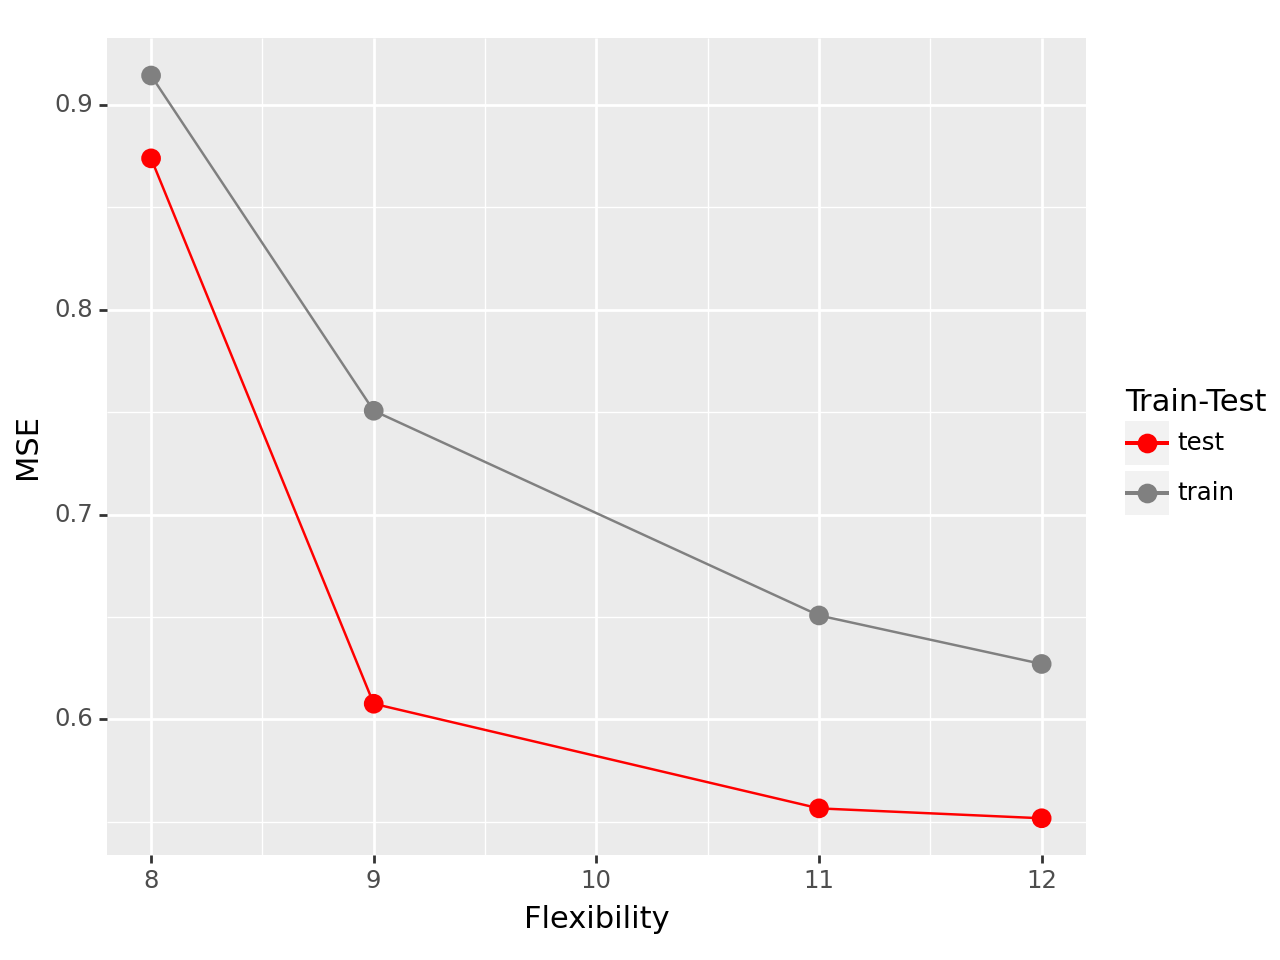

<Figure Size: (640 x 480)>

In [128]:
(ggplot(df, aes(x="Flexibility", y="MSE", color="Train-Test")) +
    geom_point(size=3) +
    geom_line(df, aes(x="Flexibility", y="MSE"))+
    scale_color_manual(values = ("red", "gray"))
)

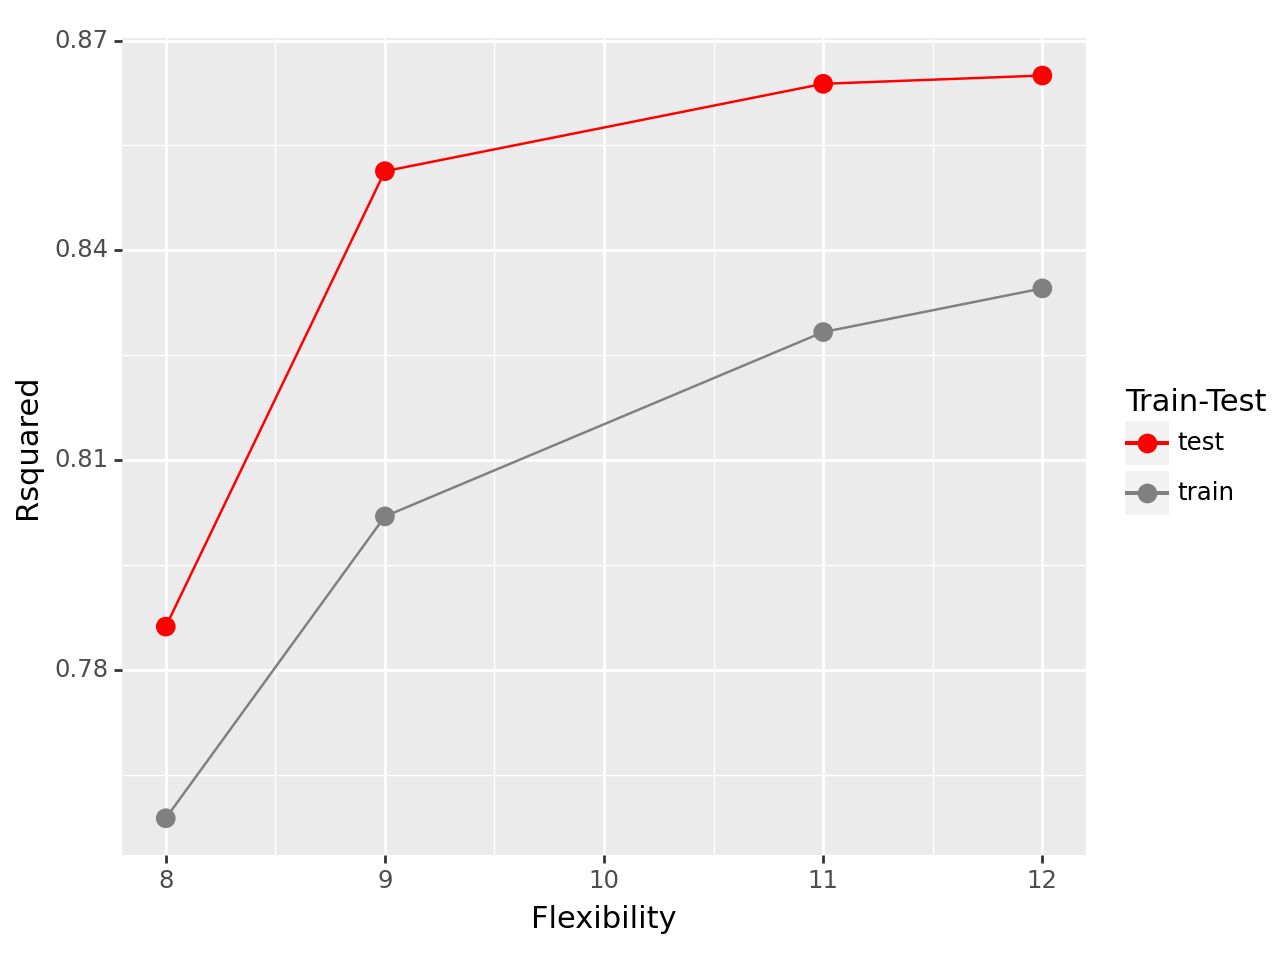

<Figure Size: (640 x 480)>

In [129]:
(ggplot(df, aes(x="Flexibility", y="Rsquared", color="Train-Test")) +
    geom_point(size=3) +
    geom_line(df, aes(x="Flexibility", y="Rsquared")) +
    scale_color_manual(values = ("red", "gray"))
)